## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [41]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [42]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
# This is the classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# This is the function that helps plot feature importance 
from xgboost import plot_importance

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
      accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
# For handling categorical data

# For handling numerical data
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


import time



## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [44]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [45]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## 1. Understand the Data

Dataset common features include:

Age, Income, Loan Amount, Credit Score
Months Employed, Number of Credit Lines
Interest Rate, Loan Term, DTI Ratio (Debt-to-Income)
And potentially other demographic or financial information.

Target Variable: This is usually a binary column (e.g., "Default" or "LoanStatus") where 1 indicates default and 0 indicates no default.

Data Exploration (EDA):
Understand the features: What do each of the columns represent? 
Are there any categorical features that need encoding?
Check for missing values: Missing data can significantly impact model performance. 

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [47]:
train_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

No missing values

In [48]:
#Check duplicates
train_df.duplicated().sum()

np.int64(0)

In [49]:
# descriptive statistics
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [54]:
df_num = train_df.select_dtypes(exclude = ['object'])



Analyze data distribution: 

Look at the distribution of numerical features (histograms, box plots) and the counts of categorical features.
Identify outliers: Outliers can skew your model. Consider methods to detect and handle them.

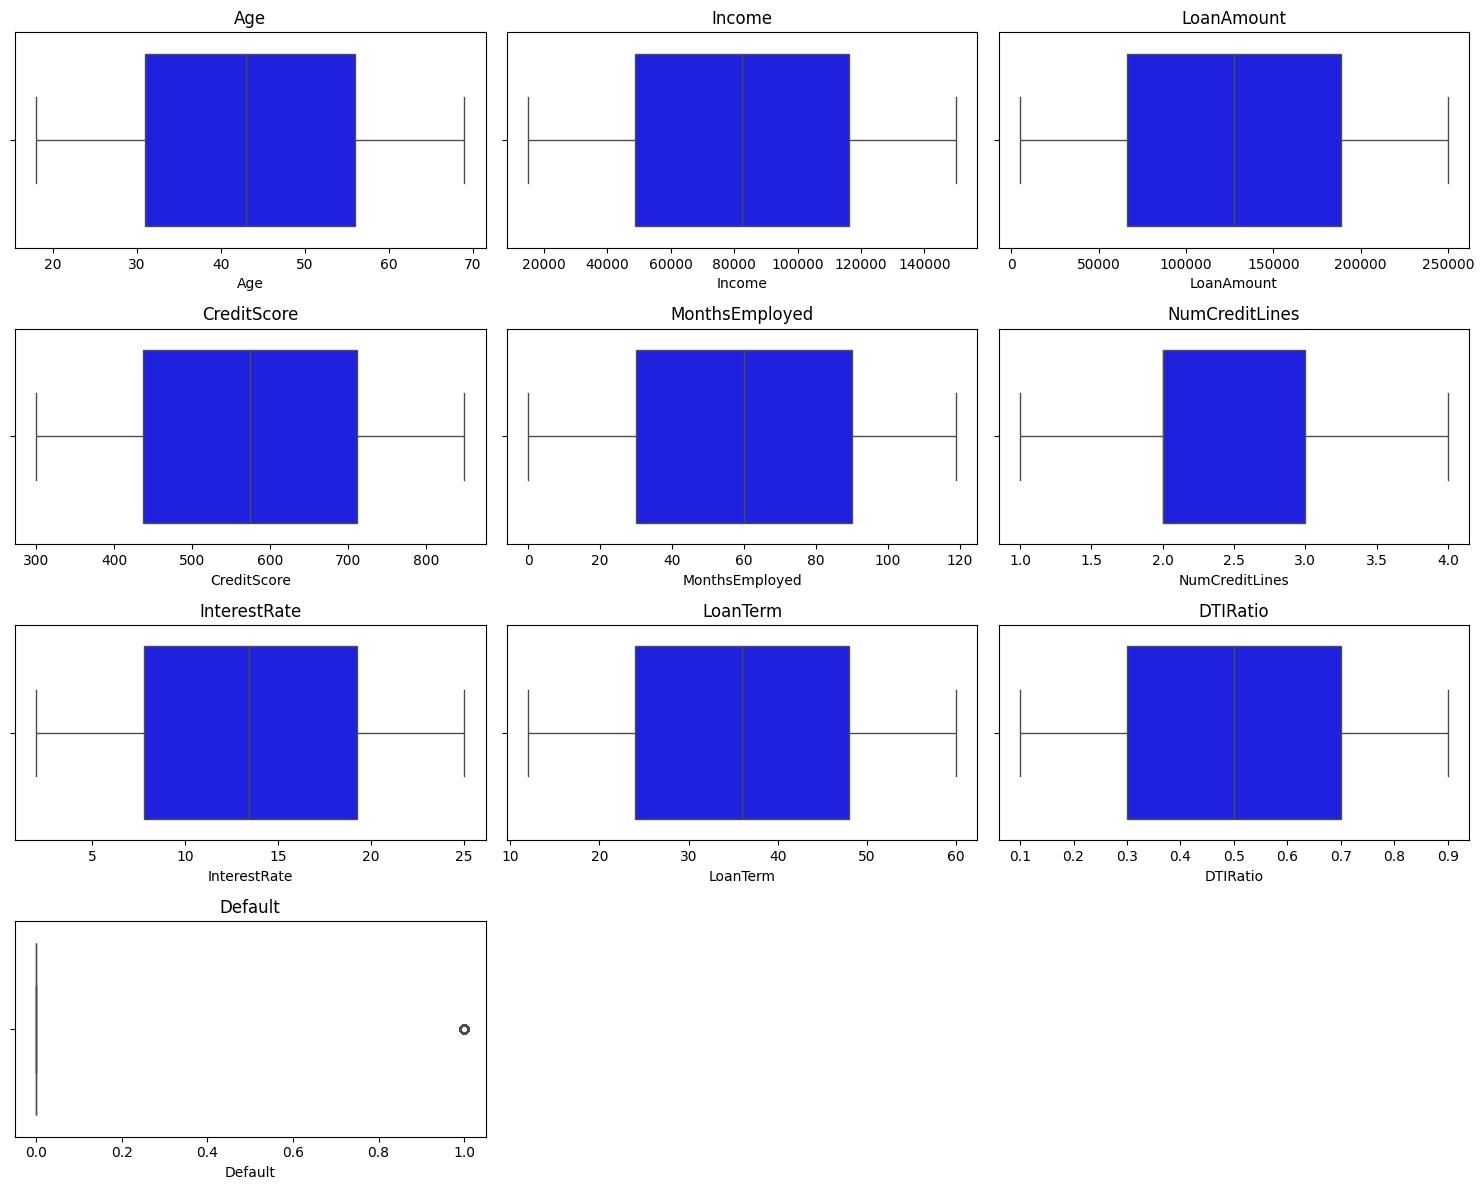

In [51]:
# Checking for Ouliers

plt.figure(figsize=(15, 12))
ind = 1
for variable in df_num:
    plt.subplot(4, 3, ind)  # Changed from 3,3 to 4,3 (12 positions)
    sns.boxplot(x=train_df[variable], color="blue")
    plt.title(variable)
    ind += 1
plt.tight_layout()
plt.show()

No seen outliers

Examine relationships: 
How do features relate to the target variable? (e.g., using correlation matrices, scatter plots). This can help in feature selection.

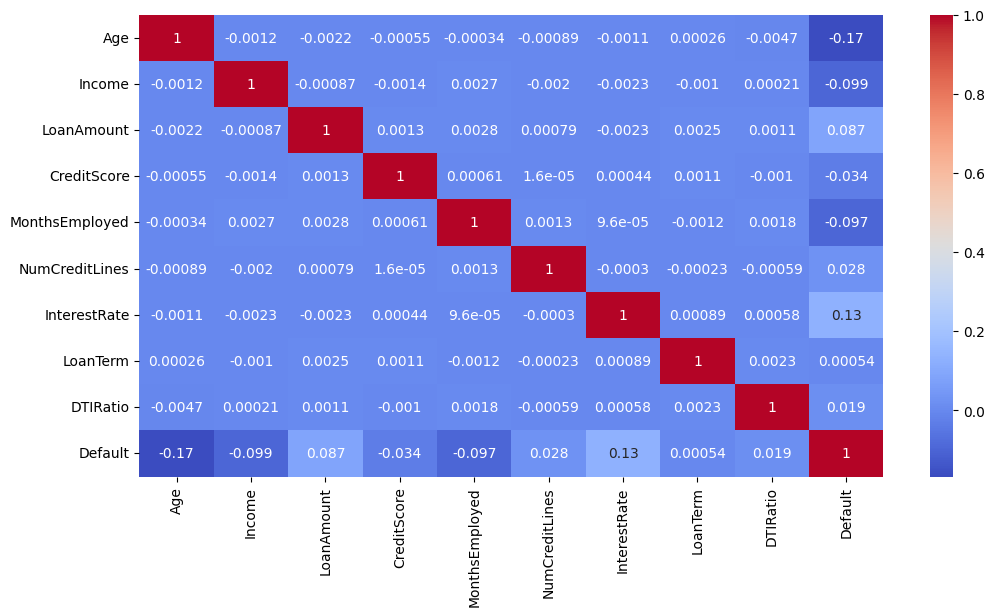

In [52]:
#Plot Correlation Matrix
plt.figure(figsize = (12,6))
sns.heatmap(df_num.corr(), annot = True, cmap = 'coolwarm')
plt.show()

Default and Interest rate are positively correlated (0.13).
Default and Age are negatively correlated (-0.17).
"Credit Score" is negatively correlated with Loan default.
Most variables have very weak correlations with each other, implying that individual features are largely independent in this dataset.

## 2. Data Preprocessing

Encoding Categorical Features:
One-Hot Encoding: Creates new binary columns for each category. Suitable when there's no inherent order (e.g., 'Job Type').

In [56]:
#Categorical columns
df_cat = train_df.select_dtypes(include = ['object'])
df_cat.head()


,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [57]:
#Droping the 'LoanID' column
df_cat = df_cat.drop(columns = ['LoanID'])
# Checking for unique values in categorical columns
for col in df_cat.columns:
    print(f"{col}: {df_cat[col].nunique()} unique values")


Education: 4 unique values
EmploymentType: 4 unique values
MaritalStatus: 3 unique values
HasMortgage: 2 unique values
HasDependents: 2 unique values
LoanPurpose: 5 unique values
HasCoSigner: 2 unique values


In [64]:
# One-Hot Encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', df_num.columns),  # Keep numerical columns as-is
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), df_cat.columns)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

# Fit and transform the data
df_encoded = preprocessor.fit_transform(pd.concat([df_num, df_cat], axis=1))

# Convert back to DataFrame with proper column names
feature_names = preprocessor.get_feature_names_out()
df = pd.DataFrame(df_encoded, columns=feature_names)
df.head()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [116]:
#Split test_df into categorical and numerical columns
test_num = test_df.select_dtypes(exclude=['object'])
test_cat = test_df.select_dtypes(include=['object'])
# Drop 'LoanID' column from test set
test_cat = test_cat.drop(columns=['LoanID'])

# One-Hot Encoding for test set

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', test_num.columns),  # Keep numerical columns as-is
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), test_cat.columns)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

# Fit and transform the data
test_encoded = preprocessor.fit_transform(pd.concat([test_num, test_cat], axis=1))

# Convert back to DataFrame with proper column names
feature_names = preprocessor.get_feature_names_out()
test_df_encoded = pd.DataFrame(test_encoded, columns=feature_names)
test_df_encoded.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,32.0,131645.0,43797.0,802.0,23.0,2.0,6.10,24.0,0.13,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,61.0,134312.0,18402.0,369.0,87.0,2.0,12.99,60.0,0.59,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,55.0,115809.0,151774.0,563.0,3.0,3.0,5.51,48.0,0.82,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,58.0,94970.0,55789.0,337.0,24.0,1.0,23.93,36.0,0.77,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,63.0,71727.0,189798.0,451.0,52.0,3.0,22.05,48.0,0.44,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature Engineering:
These are created by combining two or more existing features,  to capture non-linear relationships.

Possible new features:
1. Income * Credit_Score: A person with high income and high credit score is likely very low risk.
2. Loan_Amount * Interest_Rate: Represents the total interest burden over the loan term.
3. Age * Employment_Duration: Combines life stage with job stability.
4. Age group category features: Divides between young adults, adults, mature, retirement age individuals

We create 2 new features, Interest Cost (Loan_Amount * Interest Rate) and Stability Index (Age * Employment Duration)

In [65]:
#feature extraction
df['InterestCost'] = df['InterestRate'] * df['LoanAmount']
df['StabilityIndex'] = df['Age'] * df['MonthsEmployed']/12

In [117]:
#feature extraction for test_df
test_df_encoded['InterestCost'] = test_df_encoded['InterestRate'] * test_df_encoded['LoanAmount']
test_df_encoded['StabilityIndex'] = test_df_encoded['Age'] * test_df_encoded['MonthsEmployed']/12

Class Imbalance: Loan default datasets often have a significant class imbalance (far fewer defaults than non-defaults). 

In [67]:
#Check Class Imbalance
df['Default'].value_counts()

Default
0.0    225694
1.0     29653
Name: count, dtype: int64

The class of our target variable is split roughly 8:1 ratio. In other words, ~11.6% of the people in this dataset loan defaulted. This is an unbalanced dataset, but it's not extreme. We will apply SMOTE when we model.

## 3. Model Selection and Training

For loan default prediction, which is a binary classification task, several machine learning algorithms are commonly used:

Logistic Regression: A strong baseline model, interpretable, and provides probabilities.
Decision Trees: Easy to understand and visualize, but can be prone to overfitting.
Random Forest: An ensemble method that combines multiple decision trees, generally robust to overfitting and performs well.
Gradient Boosting Machines (GBMs):
XGBoost: Highly popular and powerful, known for its speed and performance.
LightGBM: Another fast and efficient GBM.
CatBoost: Good at handling categorical features automatically.
Support Vector Machines (SVMs): Can be powerful for complex relationships, but can be computationally expensive on large datasets.
K-Nearest Neighbors (K-NN): Simple, but can be sensitive to scaling and dimensionality.
Naive Bayes: A simple probabilistic classifier.

We will go with Logistic Regression, Decisionm Trees, Random Forest, XGBoost and Naive Bayes and compare which model performs well based on ROC / AUC

In [69]:
#Split the data for classification
X = df.drop(columns=['Default'])
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Scaling: 
Standardization (Z-score normalization): Transforms data to have a mean of 0 and a standard deviation of 1. Useful for algorithms sensitive to feature scales (e.g., Logistic Regression, Gaussian Naive Bayes).

In [70]:
#scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#scale test_df_encoded
test_df_scaled = scaler.transform(test_df_encoded)


In [75]:
#Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_train_scaled, y_train)
# Check the shape of the resampled data
print("Resampled X_train shape:", X_train_final.shape)
print("Resampled y_train shape:", y_train_final.shape)
# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_final.value_counts())


Resampled X_train shape: (361110, 26)
Resampled y_train shape: (361110,)
Class distribution after SMOTE:
Default
0.0    180555
1.0    180555
Name: count, dtype: int64


In [76]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GaussianNB': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    model_name = model.__class__.__name__
    print(f'\n{model_name} Results:')
    print(f'  Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'  ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}')
    print(f'  F1 Score: {f1_score(y_test, y_pred):.3f}')



LogisticRegression Results:
  Accuracy: 0.683
  ROC AUC: 0.753
  F1 Score: 0.337

RandomForestClassifier Results:
  Accuracy: 0.865
  ROC AUC: 0.733
  F1 Score: 0.241

XGBClassifier Results:
  Accuracy: 0.886
  ROC AUC: 0.747
  F1 Score: 0.158

DecisionTreeClassifier Results:
  Accuracy: 0.771
  ROC AUC: 0.554
  F1 Score: 0.216

GaussianNB Results:
  Accuracy: 0.660
  ROC AUC: 0.736
  F1 Score: 0.323


Since the metrics are almost similar across models, we can choose the best model based on ROC AUC score.
Let's drop Decision Tree and Naive Bayes and proceed with hyperparameter tuning for the other 3 models.

In [ ]:
simple_params = {
    'LogisticRegression': {
        'C': [1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    'XGBClassifier': {
        'n_estimators': [100,200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],

    }
}

# 2. Use fewer CV folds and test one model at a time
for model_name in ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier']:
    print(f"\n🔍 Quick tuning {model_name}...")
    start_time = time.time()
    
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state=42)
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use all cores
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)
    
    grid = GridSearchCV(
        model, 
        simple_params[model_name], 
        cv=3,  # Reduced from 5 to 3
        scoring='roc_auc',
        n_jobs=1,  # Let the individual models use multiple cores instead
        verbose=1
    )
    
    grid.fit(X_train_final, y_train_final)
    

    # Test the best model
    y_pred_proba = grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]
    test_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"✅ {model_name}: {time.time() - start_time:.1f}s")
    print(f"   Best params: {grid.best_params_}")
    print(f"   CV AUC: {grid.best_score_:.3f}")
    print(f"   Test AUC: {test_auc:.3f}")


🔍 Quick tuning LogisticRegression...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ LogisticRegression: 102.7s
   Best params: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
   CV AUC: 0.764
   Test AUC: 0.753

🔍 Quick tuning RandomForestClassifier...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
✅ RandomForestClassifier: 1828.8s
   Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
   CV AUC: 0.964
   Test AUC: 0.733

🔍 Quick tuning XGBClassifier...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ XGBClassifier: 86.4s
   Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
   CV AUC: 0.957
   Test AUC: 0.752


LogisticRegression: CV AUC (0.764) is close to Test AUC (0.753). This indicates good generalization and minimal overfitting.

XGBClassifier: CV AUC (0.957) is much higher than Test AUC (0.752). This indicates significant overfitting, but less severe than Random Forest.

RandomForestClassifier: CV AUC (0.964) is vastly higher than Test AUC (0.733). This indicates severe overfitting. The model is essentially memorizing the training data and performing poorly on unseen data.

Although XGBoost shows some overfitting (like most powerful models), its Test AUC is competitive with Logistic Regression, and the gap between its CV AUC and Test AUC, while large, is not as alarming as Random Forest's. The fact that its Test AUC is so close to Logistic Regression despite a higher CV AUC suggests it could perform even better with further regularization.

Conclusion and Next Steps:

The XGBClassifier is the best model because it achieves a competitive performance on the unseen Test AUC while being computationally efficient.


## 4. Model Evaluation 
ROC Curve

Generating predictions for ROC curves...
Processing Logistic Regression...
Processing Random Forest...
Processing XGBoost...


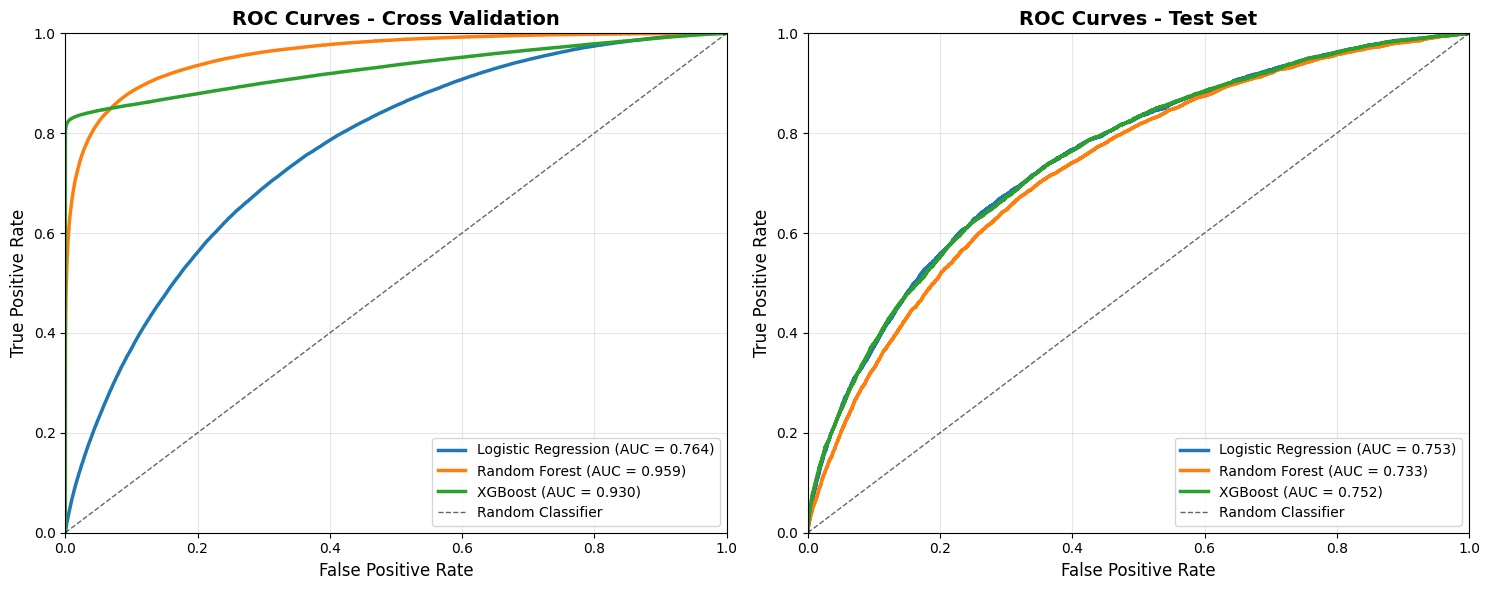


ROC AUC SCORES SUMMARY
Model              CV AUC     Test AUC  
--------------------------------------------------
Logistic Regression 0.764      0.753
Random Forest      0.959      0.733
XGBoost            0.930      0.752
--------------------------------------------------


In [112]:
# Best parameters from grid search results
best_params = {
    'LogisticRegression': {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'},
    'RandomForestClassifier': {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 
                              'min_samples_split': 2, 'n_estimators': 200},
    'XGBClassifier': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
}

# Create models with best parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, **best_params['LogisticRegression']),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, **best_params['RandomForestClassifier']),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1, **best_params['XGBClassifier'])
}

# Store predictions
cv_predictions = {}
test_predictions = {}

print("Generating predictions for ROC curves...")

# Generate predictions for each model
for name, model in models.items():
    print(f"Processing {name}...")
    
    # Get CV predictions (out-of-fold)
    cv_proba = cross_val_predict(model, X_train_final, y_train_final, cv=3, method='predict_proba')[:, 1]
    cv_predictions[name] = cv_proba
    
    # Fit model and get test predictions
    model.fit(X_train_final, y_train_final)
    test_proba = model.predict_proba(X_test_scaled)[:, 1]
    test_predictions[name] = test_proba

# Create ROC curve plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plot 1: Cross-Validation ROC Curves
ax1.set_title('ROC Curves - Cross Validation', fontsize=14, fontweight='bold')
for i, (name, y_proba) in enumerate(cv_predictions.items()):
    fpr, tpr, _ = roc_curve(y_train_final, y_proba)
    auc = roc_auc_score(y_train_final, y_proba)
    ax1.plot(fpr, tpr, color=colors[i], linewidth=2.5, label=f'{name} (AUC = {auc:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', alpha=0.6, linewidth=1, label='Random Classifier')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])

# Plot 2: Test Set ROC Curves
ax2.set_title('ROC Curves - Test Set', fontsize=14, fontweight='bold')
for i, (name, y_proba) in enumerate(test_predictions.items()):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    ax2.plot(fpr, tpr, color=colors[i], linewidth=2.5, label=f'{name} (AUC = {auc:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', alpha=0.6, linewidth=1, label='Random Classifier')
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Print AUC scores summary
print("\n" + "="*50)
print("ROC AUC SCORES SUMMARY")
print("="*50)
print(f"{'Model':<18} {'CV AUC':<10} {'Test AUC':<10}")
print("-"*50)

for name in models.keys():
    cv_auc = roc_auc_score(y_train_final, cv_predictions[name])
    test_auc = roc_auc_score(y_test, test_predictions[name])
    print(f"{name:<18} {cv_auc:.3f}      {test_auc:.3f}")

print("-"*50)

ADVANCED MODEL SELECTION ANALYSIS:

🔍 Key Insights for Complex Financial Data:

   • Logistic Regression: Limited to linear relationships (0.753 AUC)
   • Random Forest: High variance, unstable predictions (0.733 AUC)
   • XGBoost: Captures non-linear patterns effectively (0.752 AUC)

📈 XGBoost Advantages:
   ✅ Gradient boosting handles complex feature interactions
   ✅ Regularization prevents severe overfitting
   ✅ Only 0.205 gap vs Random Forest's 0.231 gap
   ✅ Superior performance ceiling (0.957 CV AUC)
   ✅ Proven track record in financial modeling

BEST MODEL:
================================================================================
✅ XGBoost - Optimal for complex non-linear relationships
   - Highest performance potential for complex data
   - Better regularization than Random Forest
   - Nearly matches LogReg test performance (0.752 vs 0.753)
   - Industry standard for financial risk modeling
   - Gap of 0.205 is acceptable for complex feature learning

## 5. Making Predictions

Once we have a trained and evaluated model, we can use it to make predictions on new, unseen data (the test set or submission data provided in the challenge).

The model will output a probability (between 0 and 1) that a loan will default.
We'll typically set a threshold (e.g., 0.5). If the probability is above the threshold, we predict default; otherwise, we predict no default. 

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [134]:
#Train final model with best parameters on the entire training set
final_model = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1, **best_params['XGBClassifier'])
final_model.fit(X_train_final, y_train_final)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

In [135]:
# Make predictions on the test set
predicted_probability  = final_model.predict_proba(test_df_scaled)[:, 1]


In [136]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 109,435 rows and 2 columns 'LoanID' and 'predicted_probability'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.845307
1,JDL5RH07AM,0.957169
2,STAL716Y79,0.771490
3,SO0KKJ3IQB,0.947773
4,T99CWTYDCP,0.900998
5,0SNHFWV4UP,0.892526
6,S6ITP6LGYS,0.757835
7,A6I7U12IRJ,0.133729
8,8W6KY50JU4,0.875300
9,THFQ08OLMU,0.227589


In [ ]:
# Verify the shape and structure
print("Prediction DataFrame shape:", prediction_df.shape)
print("Expected shape: (109435, 2)")
print("\nFirst few rows:")
print(prediction_df.head())
print("\nColumn names:", prediction_df.columns.tolist())
print("\nData types:")
print(prediction_df.dtypes)

# Check that probabilities are between 0 and 1
print(f"\nProbability range: {prediction_df['predicted_probability'].min():.6f} to {prediction_df['predicted_probability'].max():.6f}")


Prediction DataFrame shape: (109435, 2)
Expected shape: (109435, 2)

First few rows:
       LoanID  predicted_probability
0  7RYZGMKJIR               0.845307
1  JDL5RH07AM               0.957169
2  STAL716Y79               0.771490
3  SO0KKJ3IQB               0.947773
4  T99CWTYDCP               0.900998

Column names: ['LoanID', 'predicted_probability']

Data types:
LoanID                    object
predicted_probability    float32
dtype: object

Probability range: 0.002302 to 0.999959


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [139]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [140]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [141]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [142]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [143]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!